# Subroutine 1
Generate points based on the labels (taken as an input from the GUI)
structure of the point:
    (t0, vel, flag (1=hyperbolic, 0=linear), label)

In [326]:
import random
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


def points_gen(nDA,nR,nCN):
    # The function generates random values of t0 - velocity pairs
    # based on number of requested waves:
    # nDA - number of direct waves (linear moveout, label 'D')
    # nR - number of reflections (hyperbolic moveout, label 'R')
    # nCN - number of coherent noise events (linear moveout, label 'N')
    # outputs (nDA+nR+nCN) * (4) list
    # each point in the list has the following structure
    # [t0 (intercept time), velocity, flag(1=hyperbolic, 0=linear), label(see above))]
    
    
    # direct arrival
    direct = []
    n = 1
    while (n <= nDA):
        direct.append([0,random.uniform(.5,1.5),0,'D'])
        n = n+1
    
    n = 1
    reflected = []
    while (n <= nR):
        reflected.append([random.uniform(0,4),random.uniform(1.5,5),1,'R'])
        n = n+1
        
    n = 1
    noise = []
    while (n <= nCN):
        noise.append([random.uniform(-2,2),random.uniform(-3,3),0,'N'])
        n = n+1
        
    events = direct + reflected + noise
    return events

In [312]:
def points_plot(events):
    x = [x/1000 for x in range(0,2000,25)]
    
    fig, ax = plt.subplots()
    
    # plot waves
    for i in events:
        if i[3] == 'D':
            y = [offset/i[1] for offset in x]
            ax.plot(x,y,'r')
        if i[3] == 'N':
            ax.plot(x,[i[0]+offset/i[1] for offset in x],'b')
        if i[3] == 'R':
            ax.plot(x,[np.sqrt(i[0]**2 + offset**2 / i[1]**2) for offset in x],'g')
    
    plt.ylabel('Time, s')
    plt.xlabel('Offset, km')
    ax.set_xlim([0,2])
    ax.set_ylim([0,4])
    ax.invert_yaxis()
    ax.set_aspect(1)
    return ax

[0, 1.3474960582076823, 0, 'D']
[0, 0.9141813168818035, 0, 'D']
[0, 1.394067647452328, 0, 'D']


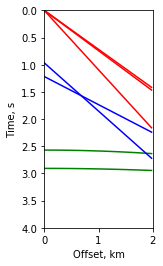

In [313]:
events=points_gen(3,2,3)
ax = points_plot(events)
plt.show(ax)

In [299]:
events

[[0, 0.8735225583717141, 0, 'D']]

In [272]:
x = [x/1000 for x in range(0,2000,25)]
ax.plot(x,[offset/.5 for offset in x],'r')

In [274]:
plt.show()

In [ ]:
def t_linear(x, v, t):
    # return a linear event (direct or coherent noise)
    return t + x/v

def t_reflected(x,v,t):
    return np.sqrt(t**2 + x**2 / v**2)

In [340]:
import random
import numpy as np
import matplotlib.pylab as plt


def points_gen_dict(x,nDA=1,nR=1,nCN=1):
    # The function generates random values of t0 - velocity pairs
    # based on number of requested waves:
    # nDA - number of direct waves (linear moveout, label 'D')
    # nR - number of reflections (hyperbolic moveout, label 'R')
    # nCN - number of coherent noise events (linear moveout, label 'N')
    # outputs (nDA+nR+nCN) * (4) list
    # each point in the list has the following structure
    # [t0 (intercept time), velocity, flag(1=hyperbolic, 0=linear), label(see above))]
    # outputs dictionary
    
    events={}
    
    # direct arrival
    events['direct'], events['reflected'], events['coherent noise'] = [],[],[]
    
    for n in range(nDA):
        events['direct'].append(t_linear(x,random.uniform(.5,1.5),0))
        
    for n in range(nR):
        events['reflected'].append(t_reflected(x,random.uniform(0,4),random.uniform(1.5,5)))
        
    for n in range(nCN):
        events['coherent noise'].append(t_linear(x,random.uniform(-2,2),random.uniform(-3,3)))
        
    return events

In [350]:
dx = .025
x = np.arange(0,2+dx,dx)

events=points_gen_dict(x,2,3,4)

(4, 0)

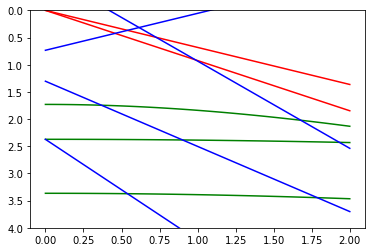

In [370]:
colors = {'direct': 'red', 'reflected': 'green', 'coherent noise': 'blue'}

for k, values in events.items():
    for array in values:
        plt.plot(x,array,c = colors[k])
plt.ylim(4,0)

(0.56666666666666665, -0.10000000000000001)

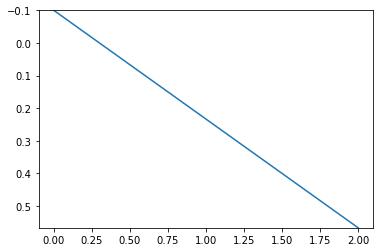

In [337]:
dt = .025
x = np.arange(0,2+dt,dt)

t = t_linear(x,3,-0.1)

plt.plot(x,t)
plt.ylim(np.amax(t),np.amin(t))

In [ ]:
for key in points_gen_dict(2,3,4):
    plt.plot(x,[offset/i[1] for offset in x])
    